# Fun with Filters and Frequencies!

Please run the below to import any important libraries

In [2]:
import os
import cv2
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
from skimage import img_as_ubyte
from scipy.signal import convolve2d

## Code to retrieve and output resulting image
Functions:
- get_file_image(fname): Retrieves the image from the file.
- convert_channel_to_image(r, g, b, alpha=None): Returns a full image from red, green, blue, and alpha channels.
- get_image_channels(image): Returns the r, g, b, and alpha (if alpha exists) channels.
- get_image_channels(image, with_alpha=False): Returns a grayscaled image, useful for gradient calculation.
- red_channel: Returns the red channel of the image.
- green_channel: Returns the green channel of the image.
- blue_channel: Returns the blue channel of the image.
- alpha_channel: Returns the alpha channel of the image.

In [3]:
def get_file_image(fname):
        relative_data_dir = "data"
        dir = os.getcwd()
        image_path = os.path.join(dir, relative_data_dir, fname)

        image = skio.imread(image_path)
        image = sk.img_as_float(image)
        return image

def convert_channel_to_image(r, g, b, alpha=None):
        if alpha is None:
                return np.dstack(([r, g, b]))
        return img_as_ubyte(np.dstack([r, g, b, alpha]))

def get_image_channels(image):
        assert len(image.shape) == 3
        if image.shape[2] == 3:
                return red_channel(image), green_channel(image), blue_channel(image), None
        elif image.shape[2] == 4:
                return red_channel(image), green_channel(image), blue_channel(image), alpha_channel(image)
        else:
                raise ValueError("Image does not have 3 or 4 channels")
        
def rgb2gray(image, with_alpha=False):
        assert len(image.shape) == 3
        if image.shape[2] == 3:
                return image.dot([0.2989, 0.5870, 0.1140])
        elif image.shape[2] == 4:
                rgb_channels = image[:, :, :3]
                alpha_channel = image[:, :, 3]
                
                grayed_rgb = rgb_channels.dot([0.2989, 0.5870, 0.1140])
                return grayed_rgb + (1 - alpha_channel) if with_alpha else grayed_rgb
        else:
                raise ValueError("Image does not have 3 or 4 channels")

def red_channel(image):
        return image[:, :, 0]

def green_channel(image):
        return image[:, :, 1]

def blue_channel(image):
        return image[:, :, 2]

def alpha_channel(image):
        if image.shape[2] == 4:
                return image[:, :, 3]
        else:
                return None

# print(get_file_image("cameraman.png").shape)
# skio.imshow(get_file_image("cameraman.png"))
# skio.show()

## Part 1: Fun with Filters

### Part 1.1: Finite Difference Operator
Functions:
- gradient_magnitude_x_axis(image): Returns the gradient of the input image with respect to x. Note the image can be any 2D matrix.
- gradient_magnitude_y_axis(image): Returns the gradient of the input image with respect to y. Note the image can be any 2D matrix.
- gradient_magnitude(image): Returns the gradient magnitude of the input image. Note the image can be any 2D matrix.
- binarize(image, threshold): Returns the binarized image on threshold.

In [4]:
def gradient_magnitude_x_axis(image):
    dx = np.array([[1, -1]])

    gradient_x = convolve2d(image, dx, boundary='symm', mode='same')
    return gradient_x

def gradient_magnitude_y_axis(image):
    dy = np.array([[1], [-1]])

    gradient_y = convolve2d(image, dy, boundary='symm', mode='same')
    return gradient_y

def gradient_magnitude(image):
    gradient_mag_x = gradient_magnitude_x_axis(image)
    gradient_mag_y = gradient_magnitude_y_axis(image)
    
    return np.sqrt((gradient_mag_x ** 2) + (gradient_mag_y ** 2))

def binarize(image, threshold):
    return (image > threshold) * 255

#### Naively getting the edges through computing the gradient magnitude

Text(0.5, 1.0, 'Gradient magnitude w.r.t. both axis')

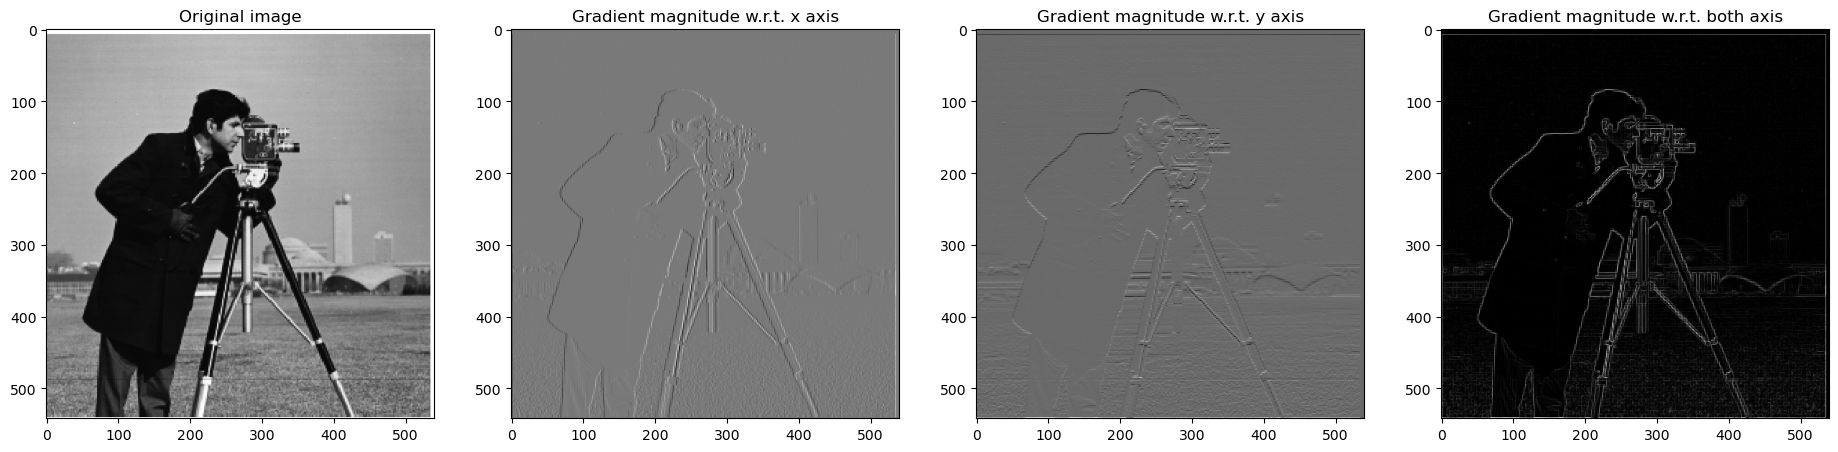

In [5]:
cameraman_im = get_file_image("cameraman.png")
grayed_cameraman_im = rgb2gray(cameraman_im)

gradient_x = gradient_magnitude_x_axis(grayed_cameraman_im)
gradient_y = gradient_magnitude_y_axis(grayed_cameraman_im)
gradient = gradient_magnitude(grayed_cameraman_im)

figure, axes = plt.subplots(1, 4, figsize=(23, 23))
axes[0].imshow(cameraman_im, cmap='gray')
axes[0].set_title("Original image")

axes[1].imshow(gradient_x, cmap='gray')
axes[1].set_title("Gradient magnitude w.r.t. x axis")

axes[2].imshow(gradient_y, cmap='gray')
axes[2].set_title("Gradient magnitude w.r.t. y axis")

axes[3].imshow(gradient, cmap='gray')
axes[3].set_title("Gradient magnitude w.r.t. both axis")

#### Testing the various thresholds on the edge image

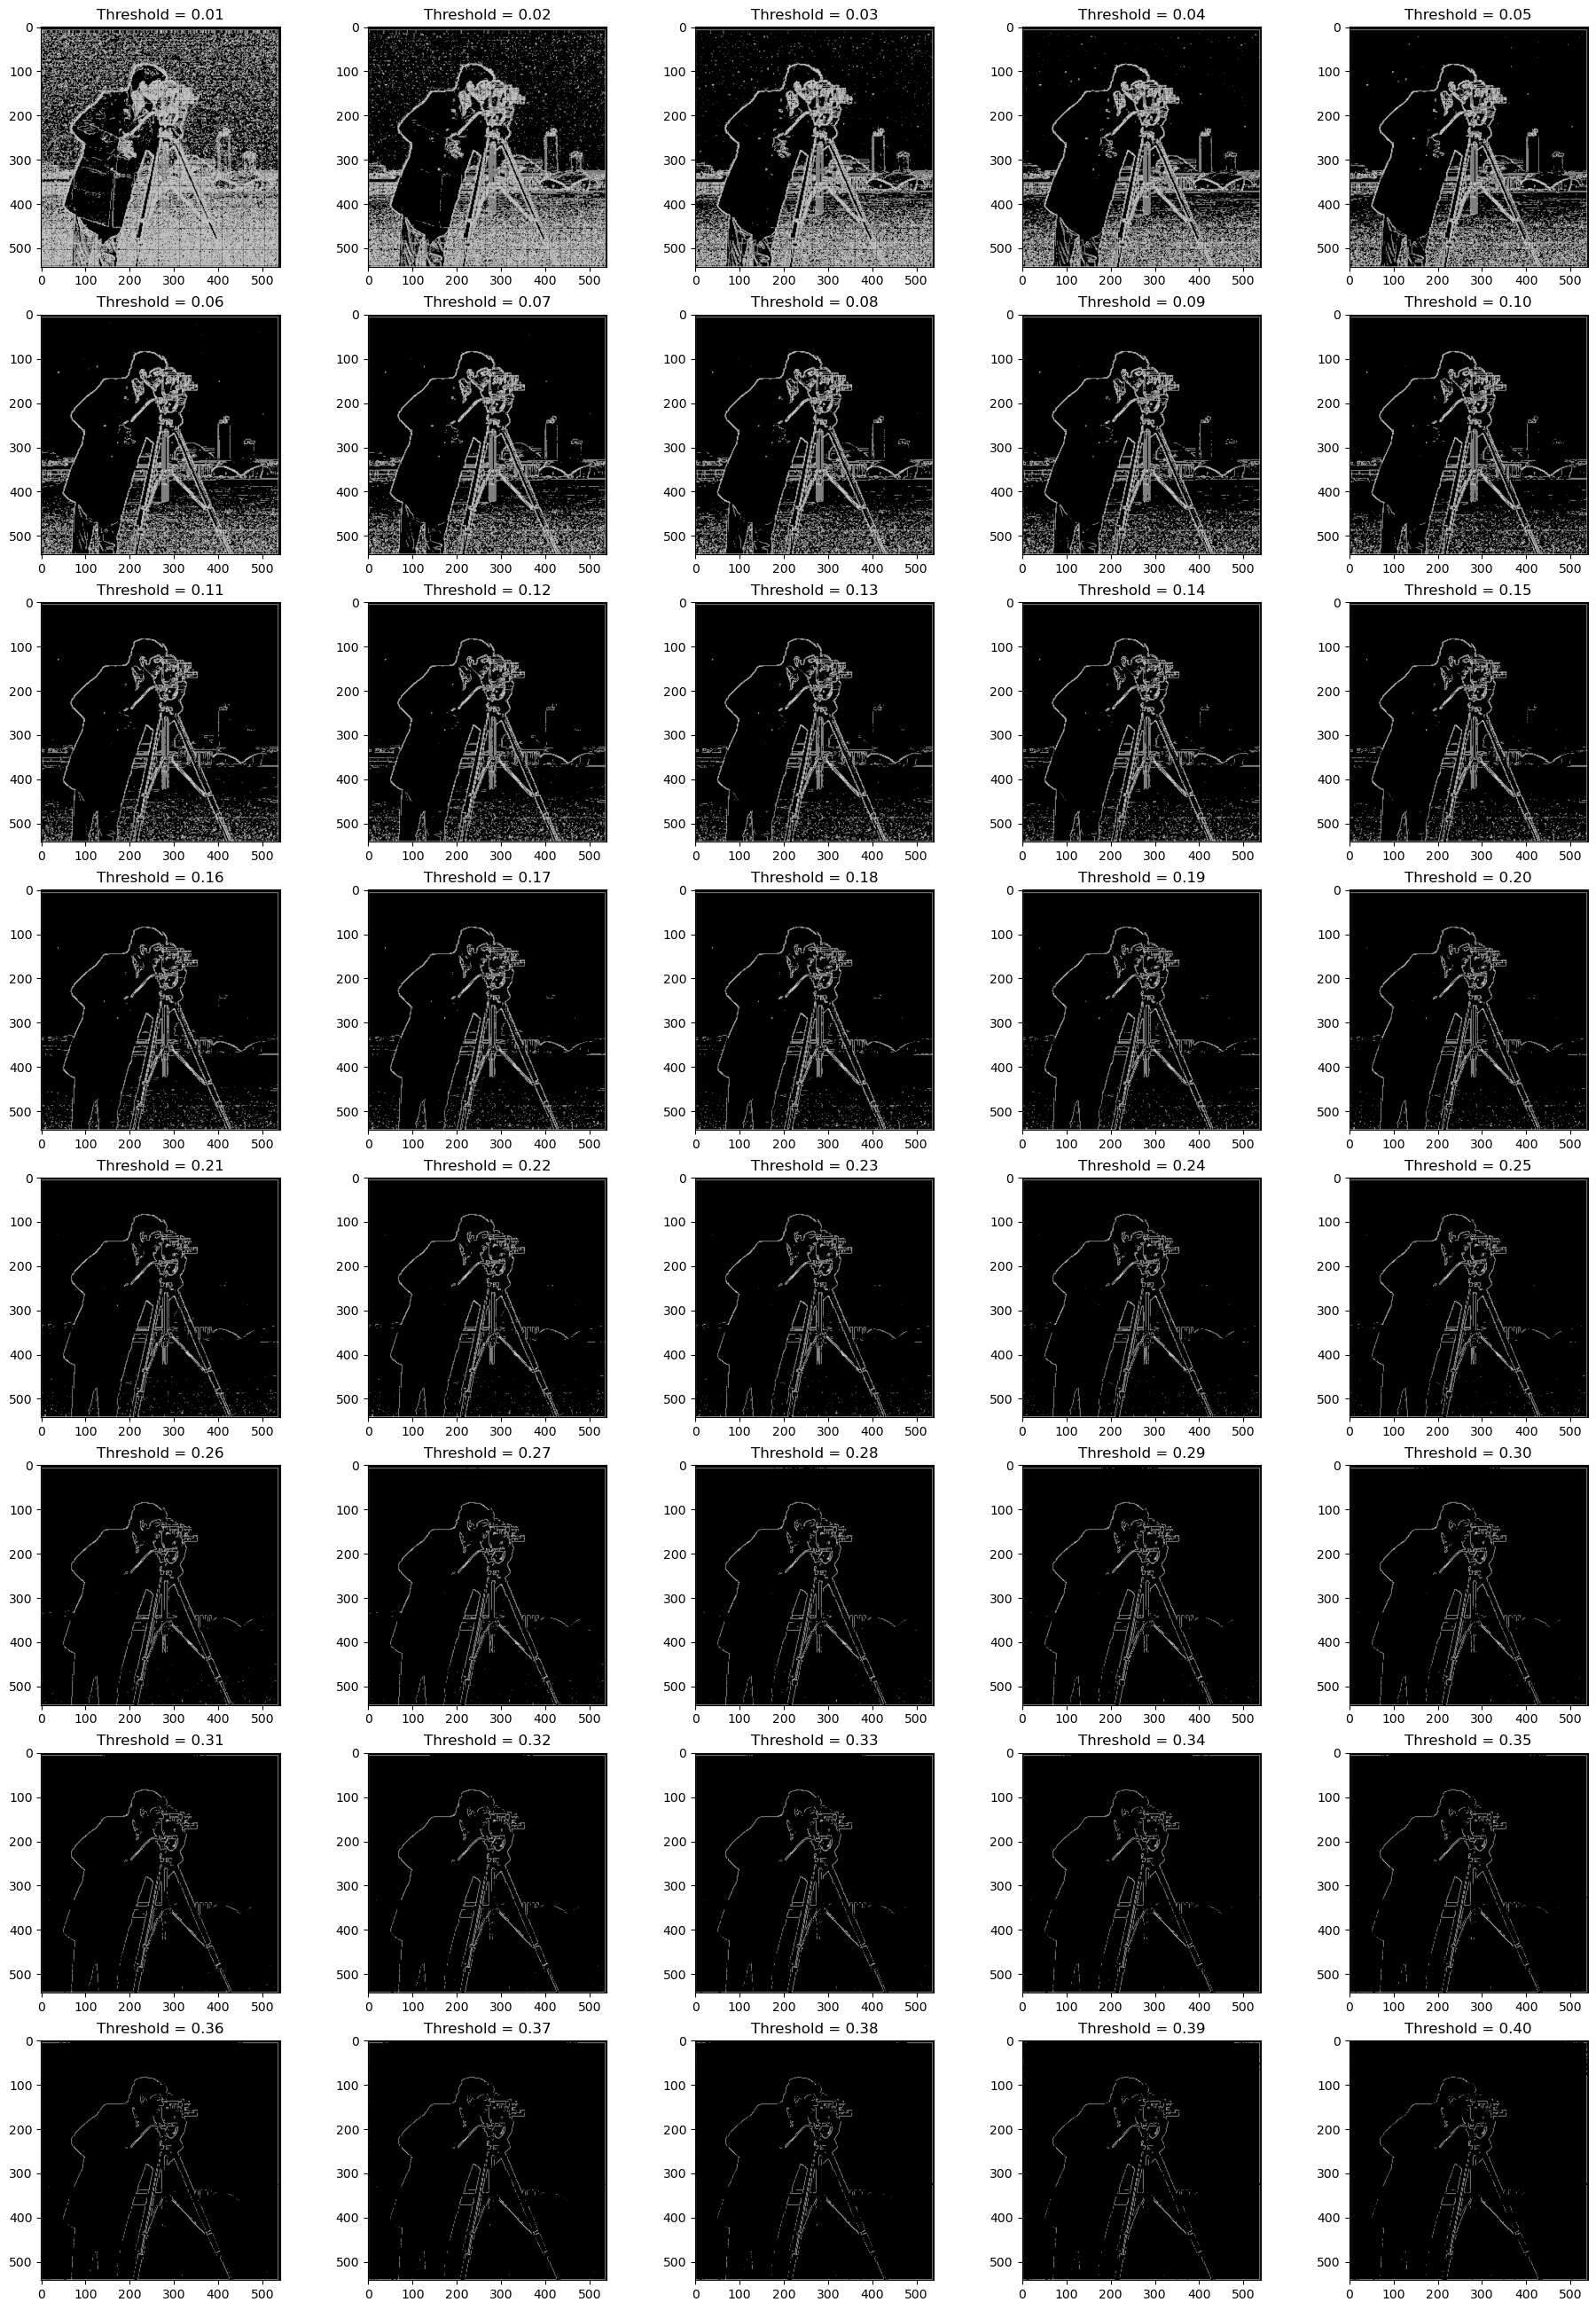

In [6]:
plot_rows = 8
plot_cols = 5
figure, axes = plt.subplots(plot_rows, plot_cols, figsize=(23, 33))

cameraman_im = get_file_image("cameraman.png")
grayed_cameraman_im = rgb2gray(cameraman_im)
gradient_cameraman = gradient_magnitude(grayed_cameraman_im)

for i in range(plot_rows * plot_cols):
    threshold = (i + 1) / 100
    gradient_cameraman_with_threshold = binarize(gradient_cameraman, threshold)
    
    row = i // plot_cols
    col = i % plot_cols
    
    axes[row, col].imshow(gradient_cameraman_with_threshold, cmap='gray')
    axes[row, col].set_title("Threshold = {:.2f}".format(threshold))

#### Final result on naive edge edtection

Text(0.5, 1.0, 'Best Threshold = 0.30')

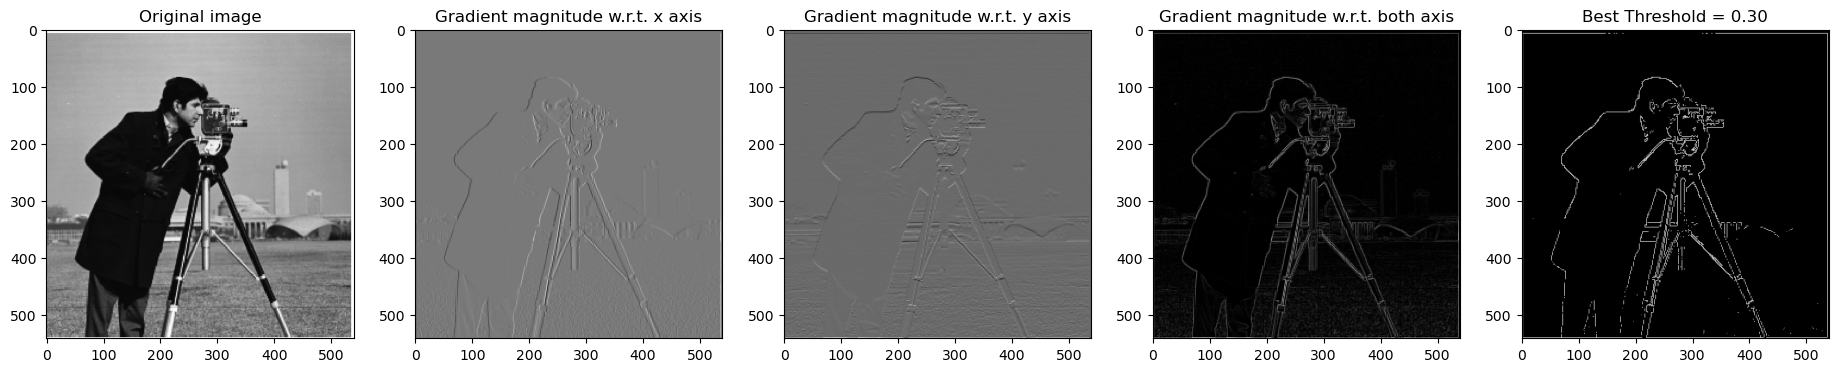

In [7]:
best_threshold = 0.30

cameraman_im = get_file_image("cameraman.png")
grayed_cameraman_im = rgb2gray(cameraman_im)
gradient_cameraman = gradient_magnitude(grayed_cameraman_im)

gradient_cameraman_with_threshold = binarize(gradient_cameraman, best_threshold)

gradient_x = gradient_magnitude_x_axis(grayed_cameraman_im)
gradient_y = gradient_magnitude_y_axis(grayed_cameraman_im)
gradient = gradient_magnitude(grayed_cameraman_im)

figure, axes = plt.subplots(1, 5, figsize=(23, 23))
axes[0].imshow(cameraman_im, cmap='gray')
axes[0].set_title("Original image")

axes[1].imshow(gradient_x, cmap='gray')
axes[1].set_title("Gradient magnitude w.r.t. x axis")

axes[2].imshow(gradient_y, cmap='gray')
axes[2].set_title("Gradient magnitude w.r.t. y axis")

axes[3].imshow(gradient, cmap='gray')
axes[3].set_title("Gradient magnitude w.r.t. both axis")

axes[4].imshow(gradient_cameraman_with_threshold, cmap='gray')
axes[4].set_title("Best Threshold = {:.2f}".format(best_threshold))

### Part 1.2: Derivative of Gaussian (DoG) Filter

In [8]:
def get_gaussian_kernel_2d(ksize, sigma):
    k1d = cv2.getGaussianKernel(ksize=ksize, sigma=sigma)
    k2d = k1d * k1d.T
    return k2d

#### Edge detection after gradient blur

Text(0.5, 1.0, 'Gradient magnitude w.r.t. both axis')

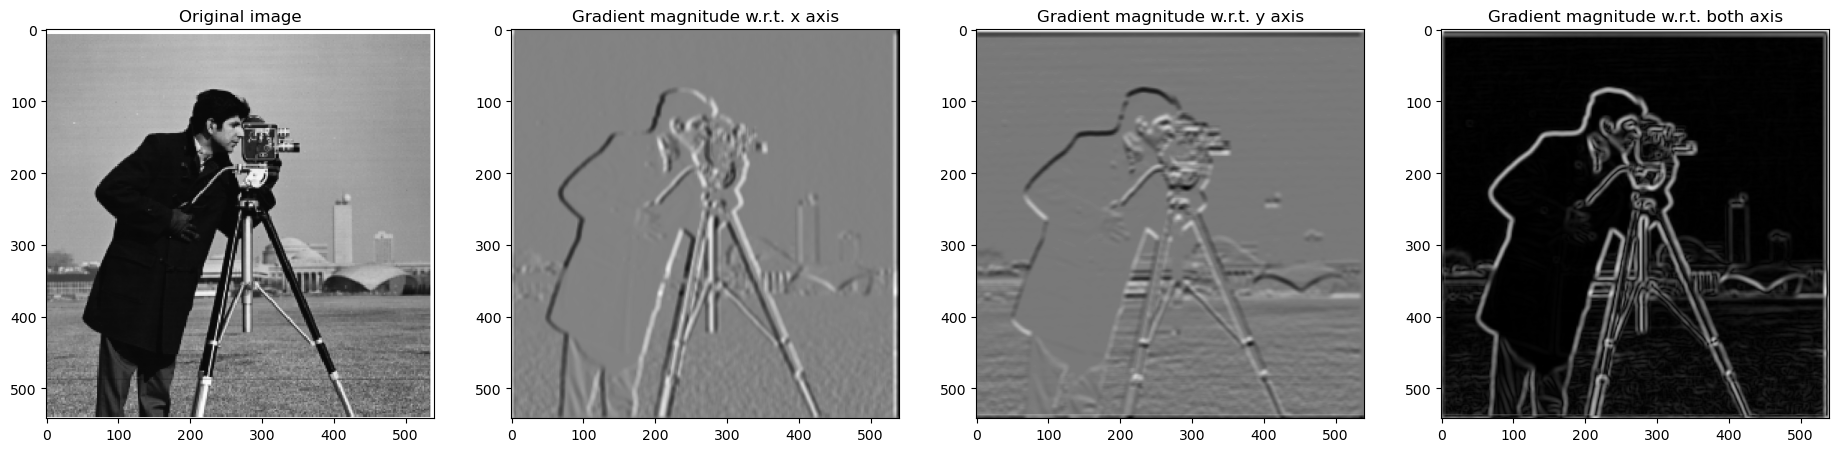

In [9]:
kernel_size = 9
kernel_sigma = 3

gaussian_kernel = get_gaussian_kernel_2d(kernel_size, kernel_sigma)

cameraman_im = get_file_image("cameraman.png")
grayed_cameraman_im = rgb2gray(cameraman_im)
blurred_cameraman_im = convolve2d(grayed_cameraman_im, gaussian_kernel, mode="same")
gradient_cameraman_x = gradient_magnitude_x_axis(blurred_cameraman_im)
gradient_cameraman_y = gradient_magnitude_y_axis(blurred_cameraman_im)
gradient_cameraman = gradient_magnitude(blurred_cameraman_im)

figure, axes = plt.subplots(1, 4, figsize=(23, 8))

axes[0].imshow(cameraman_im, cmap='gray')
axes[0].set_title("Original image")

axes[1].imshow(gradient_cameraman_x, cmap='gray')
axes[1].set_title("Gradient magnitude w.r.t. x axis")

axes[2].imshow(gradient_cameraman_y, cmap='gray')
axes[2].set_title("Gradient magnitude w.r.t. y axis")

axes[3].imshow(gradient_cameraman, cmap='gray')
axes[3].set_title("Gradient magnitude w.r.t. both axis")

#### Testing the various thresholds on the edge image post gausiaan blurr

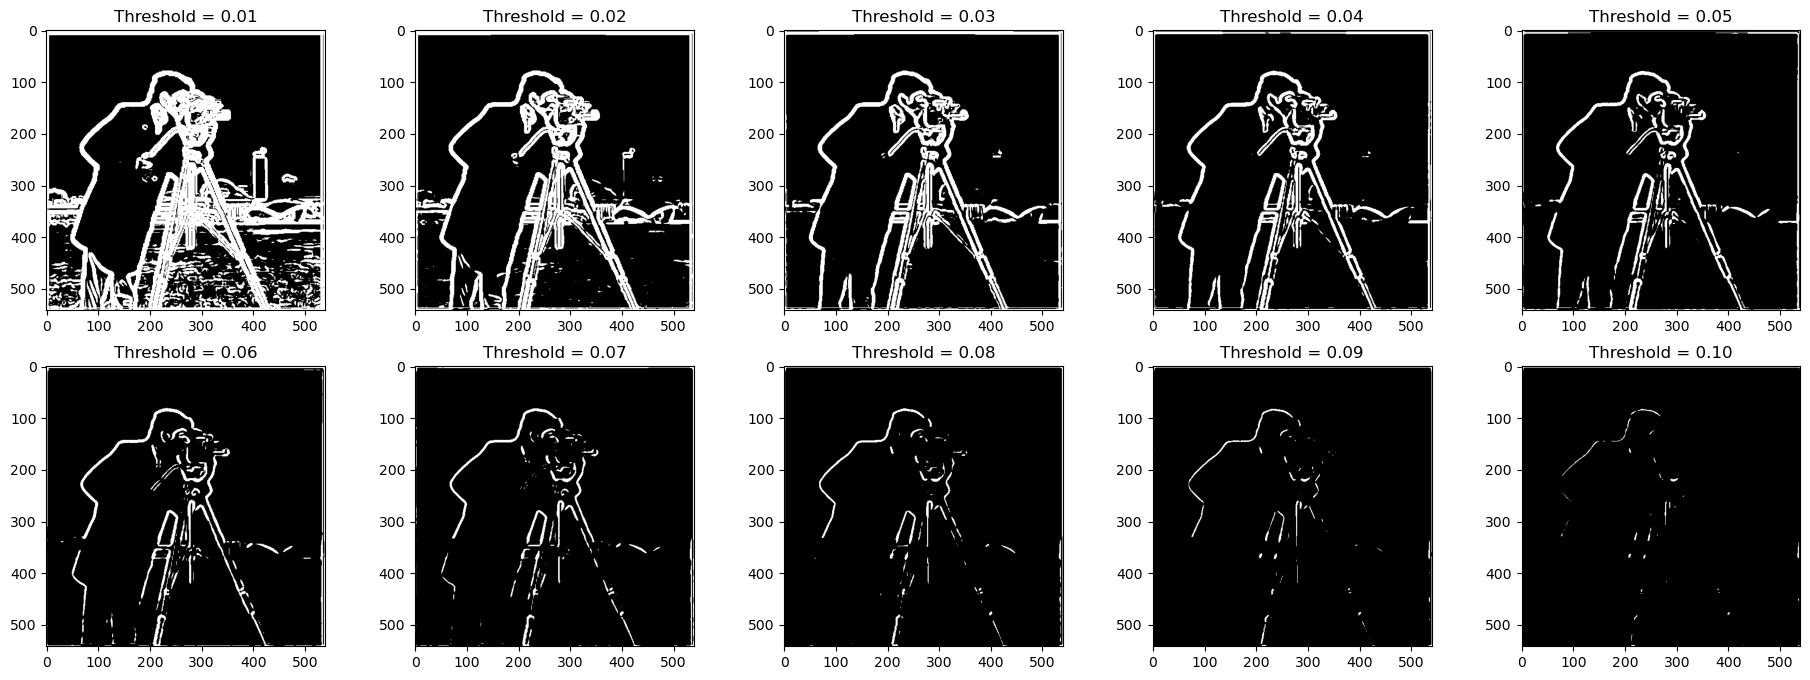

In [10]:
plot_rows = 2
plot_cols = 5
figure, axes = plt.subplots(plot_rows, plot_cols, figsize=(23, 8))

kernel_size = 9
kernel_sigma = 3
gaussian_kernel = get_gaussian_kernel_2d(kernel_size, kernel_sigma)

cameraman_im = get_file_image("cameraman.png")
grayed_cameraman_im = rgb2gray(cameraman_im)
blurred_cameraman_im = convolve2d(grayed_cameraman_im, gaussian_kernel, mode="same")
gradient_cameraman = gradient_magnitude(blurred_cameraman_im)

for i in range(plot_rows * plot_cols):
    threshold = (i + 1) / 100
    gradient_cameraman_with_threshold = binarize(gradient_cameraman, threshold)
    
    row = i // plot_cols
    col = i % plot_cols
    
    axes[row, col].imshow(gradient_cameraman_with_threshold, cmap='gray')
    axes[row, col].set_title("Threshold = {:.2f}".format(threshold))

#### Using Derivative of Gradients for edge detection
Problems faced:
- Mistaked into taking the gradient magnitude of the DoG itself when in actuality, we should apply the DoG wrt x and y onto the image respectively then take its gradient magnitude
- Returned the absolute values for the gradients wrt x and y 

Text(0.5, 1.0, 'After applying Derivative of Gaussian')

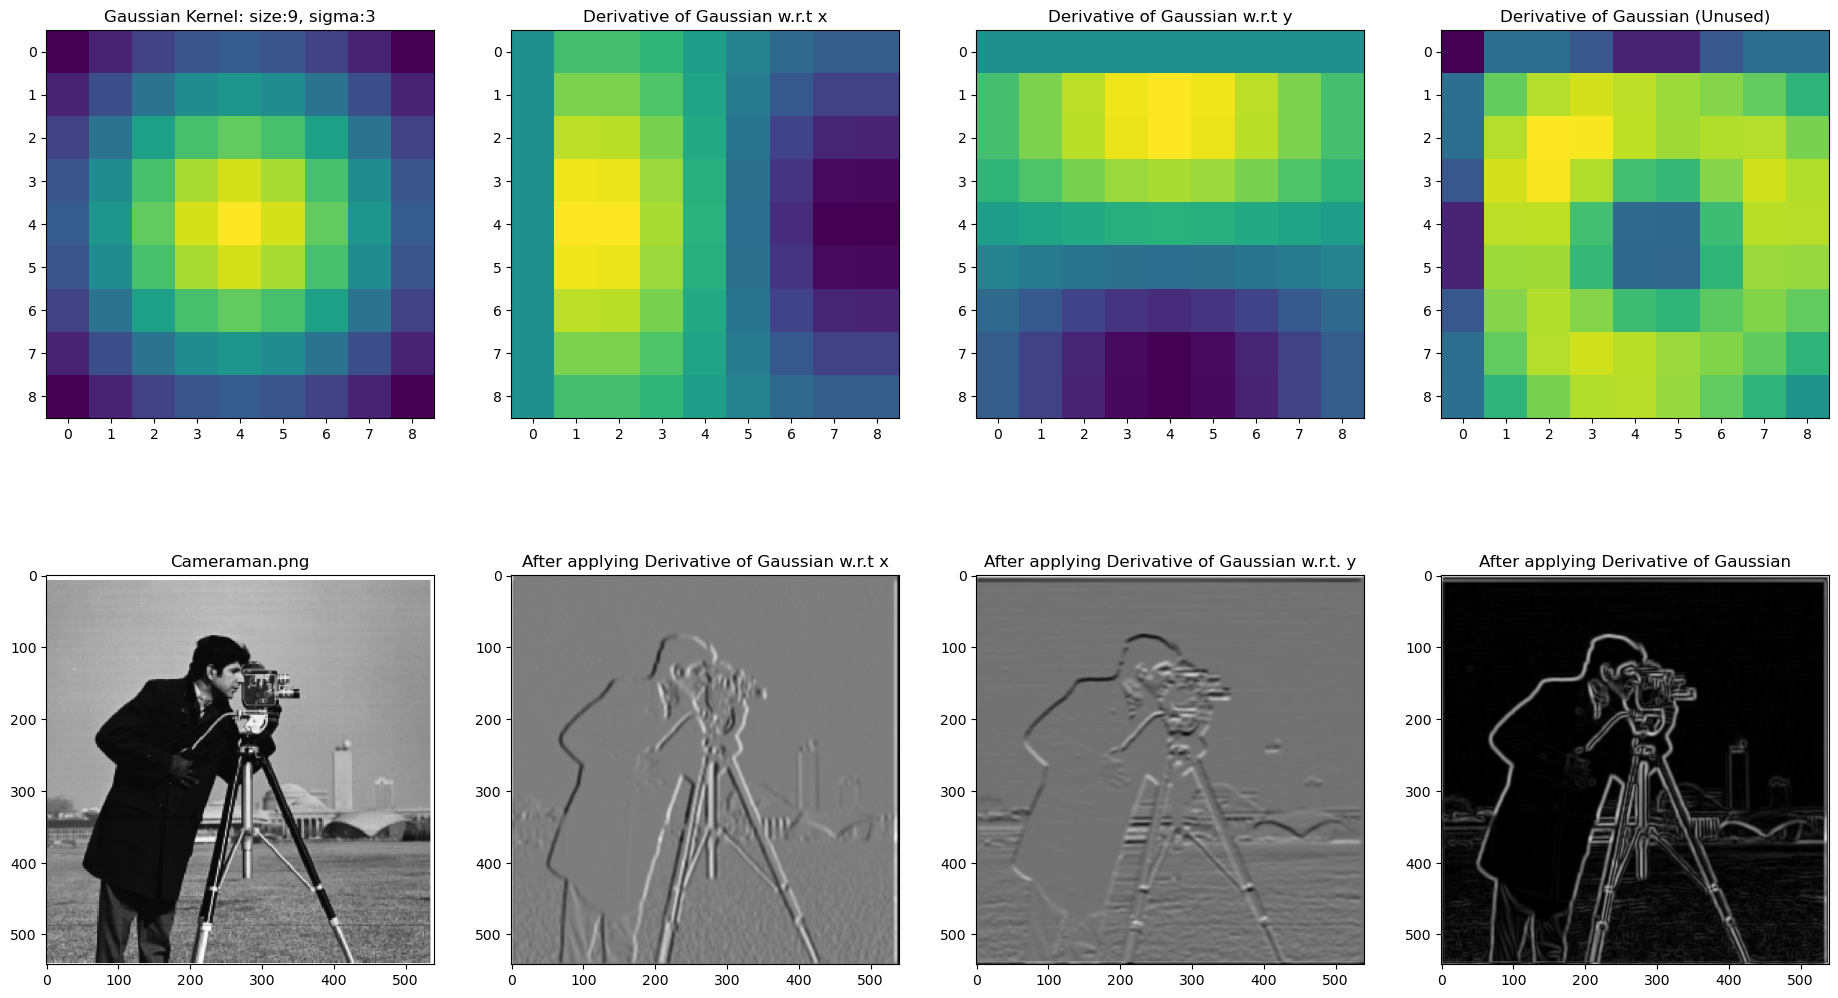

In [11]:
kernel_size = 9
kernel_sigma = 3
gaussian_kernel = get_gaussian_kernel_2d(kernel_size, kernel_sigma)

gradient_gradient_kernel_x = gradient_magnitude_x_axis(gaussian_kernel)
gradient_gradient_kernel_y = gradient_magnitude_y_axis(gaussian_kernel)
gradient_gradient_kernel = gradient_magnitude(gaussian_kernel)

cameraman_im = get_file_image("cameraman.png")
grayed_cameraman_im = rgb2gray(cameraman_im)

edge_cameraman_x = convolve2d(grayed_cameraman_im, gradient_gradient_kernel_x,  mode="same")
edge_cameraman_y = convolve2d(grayed_cameraman_im, gradient_gradient_kernel_y,  mode="same")
edge_cameraman = np.sqrt(edge_cameraman_x ** 2 + edge_cameraman_y ** 2)

################ SHOW RESULT ################
figure, axes = plt.subplots(2, 4, figsize=(23, 13))

axes[0, 0].imshow(gaussian_kernel)
axes[0, 0].set_title("Gaussian Kernel: size:{}, sigma:{}".format(kernel_size, kernel_sigma))

axes[0, 1].imshow(gradient_gradient_kernel_x)
axes[0, 1].set_title("Derivative of Gaussian w.r.t x")

axes[0, 2].imshow(gradient_gradient_kernel_y)
axes[0, 2].set_title("Derivative of Gaussian w.r.t y")

axes[0, 3].imshow(gradient_gradient_kernel)
axes[0, 3].set_title("Derivative of Gaussian (Unused)")

axes[1, 0].imshow(cameraman_im, cmap='gray')
axes[1, 0].set_title("Cameraman.png")

axes[1, 1].imshow(edge_cameraman_x, cmap='gray')
axes[1, 1].set_title("After applying Derivative of Gaussian w.r.t x")

axes[1, 2].imshow(edge_cameraman_y, cmap='gray')
axes[1, 2].set_title("After applying Derivative of Gaussian w.r.t. y")

axes[1, 3].imshow(edge_cameraman, cmap='gray')
axes[1, 3].set_title("After applying Derivative of Gaussian")



## Comparing the results

## Part 2: Fun with Frequencies!

### Part 2.1 Image "Sharpening"
We can subtract the blurred version from the original image to get the high frequencies of the image. An image often looks sharper if it has stronger high frequencies. So, lets add a little bit more high frequencies to the image! Combine this into a single convolution operation which is called the unsharp mask filter. 

In [32]:
def apply_func_image(image, function):
        r, g, b, alpha = get_image_channels(image)
        
        r = function(r)
        g = function(g)
        b = function(b)
        alpha = function(alpha) if alpha is not None else alpha
        
        return np.dstack([r, g, b]) if alpha is None else np.dstack([r, g, b, alpha])

def apply_gaussian_blurr(image, kernel_size, kernel_sigma):
        gaussian_kernel = get_gaussian_kernel_2d(kernel_size, kernel_sigma)
        
        return convolve2d(image, gaussian_kernel, mode="same")

def unsharpen_image(image, kernel_size, kernel_sigma):
        return apply_func_image(image, lambda img: apply_gaussian_blurr(img, kernel_size, kernel_sigma))

def highpass_image(image, kernel_size, kernel_sigma):
        return image - unsharpen_image(image, kernel_size, kernel_sigma)

def sharpen_image(image, alpha=1, kernel_size=33, kernel_sigma=11):
        high_freq_image = highpass_image(image, kernel_size, kernel_sigma)
        sharpened_image = image + alpha * high_freq_image 
        return np.clip(sharpened_image, 0, 255)

def optimized_sharpen_image(image, alpha=1, kernel_size=33, kernel_sigma=11):
        gaussian_kernel = get_gaussian_kernel_2d(kernel_size, kernel_sigma)
        unit_impulse = np.eye(*gaussian_kernel.shape)
        sharpened_kernel = (1 + alpha)*unit_impulse - alpha*gaussian_kernel
        
        sharpened_image = apply_func_image(image, lambda im: convolve2d(im, sharpened_kernel, boundary='symm', mode='same'))
        
        return np.clip(sharpened_image, 0, 255)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sharpened with alpha 2')

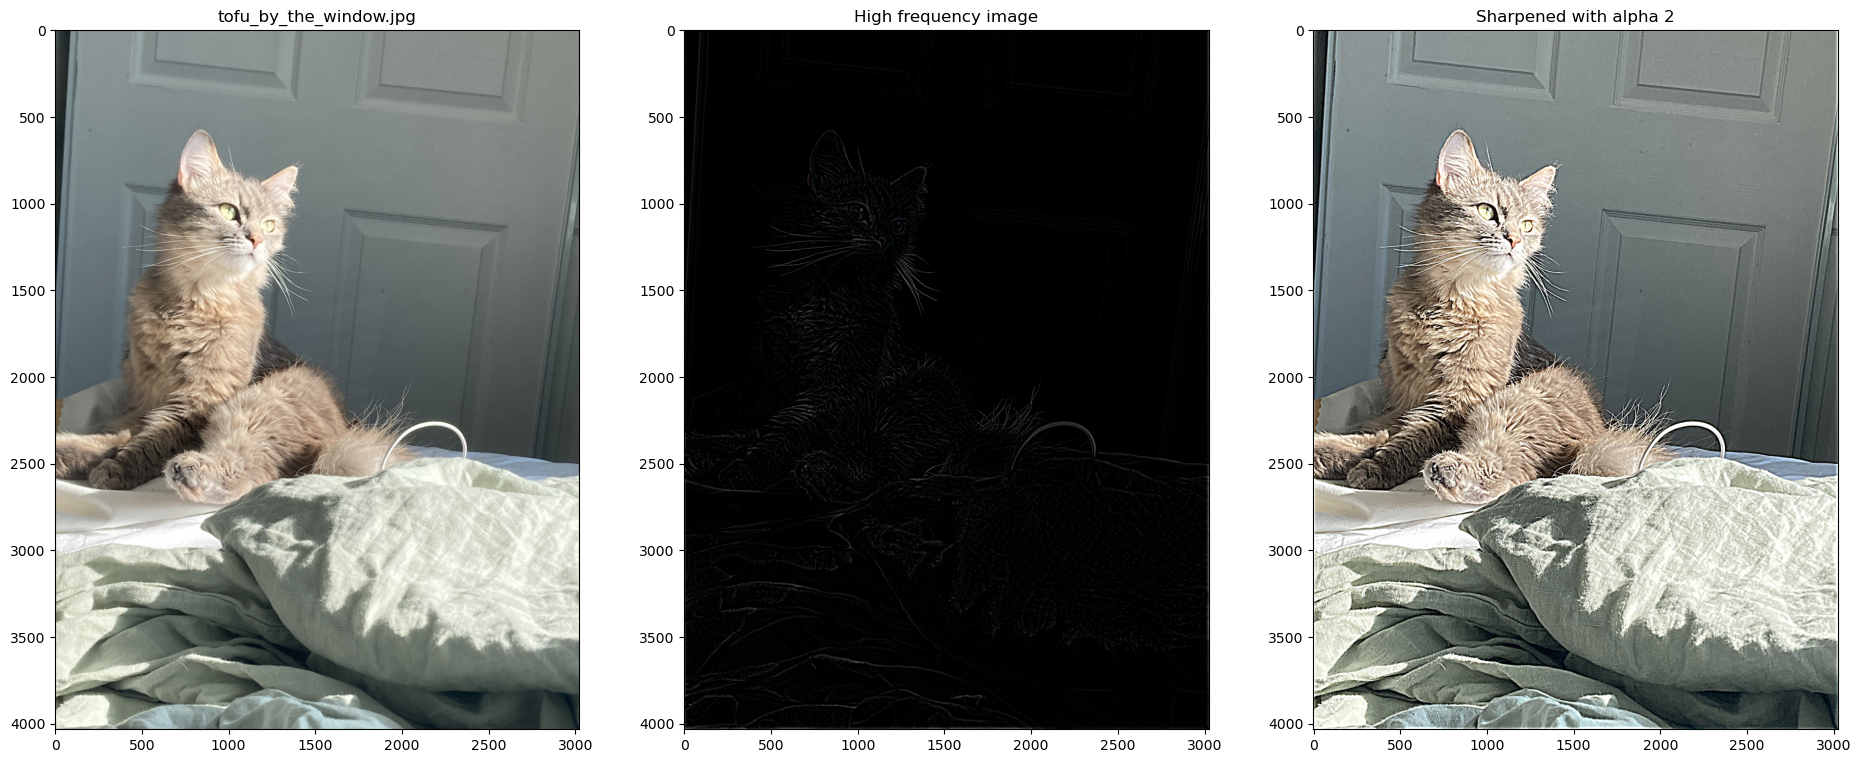

In [13]:
# kernel_size = 33
# kernel_sigma = 11

# tofu_by_window = get_file_image("tofu_by_the_window.jpg")
# blurry_tofu_by_window = apply_func_image(tofu_by_window, lambda img: apply_gaussian_blurr(img, kernel_size, kernel_sigma))
# sharped_tofu_by_window = sharpen_image(tofu_by_window, alpha=2)

# figure, axes = plt.subplots(1, 3, figsize=(23, 13))
# axes[0].imshow(tofu_by_window)
# axes[0].set_title("tofu_by_the_window.jpg")

# axes[1].imshow(highpass_image(tofu_by_window, kernel_size, kernel_sigma))
# axes[1].set_title("High frequency image")

# axes[2].imshow(sharped_tofu_by_window)
# axes[2].set_title("Sharpened with alpha 2")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sharpened with alpha 2')

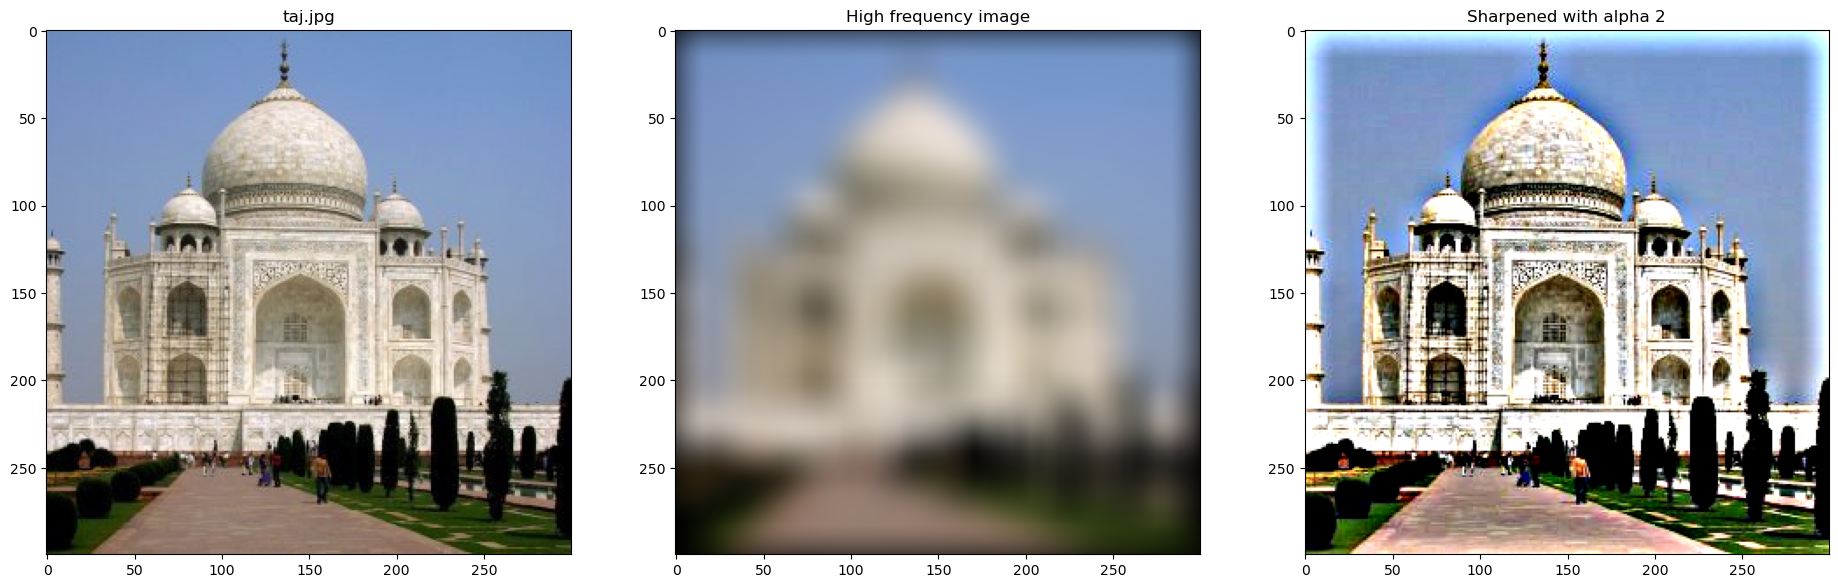

In [36]:
kernel_size = 33
kernel_sigma = 11

taj_img = get_file_image("taj.jpg")

figure, axes = plt.subplots(1, 3, figsize=(23, 13))
axes[0].imshow(taj_img)
axes[0].set_title("taj.jpg")

axes[1].imshow(unsharpen_image(taj_img, kernel_size, kernel_sigma))
axes[1].set_title("High frequency image")

axes[2].imshow(sharpen_image(taj_img, alpha=2))
axes[2].set_title("Sharpened with alpha 2")

#### Evaluation: Does sharpening restore a blurred image to its original?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


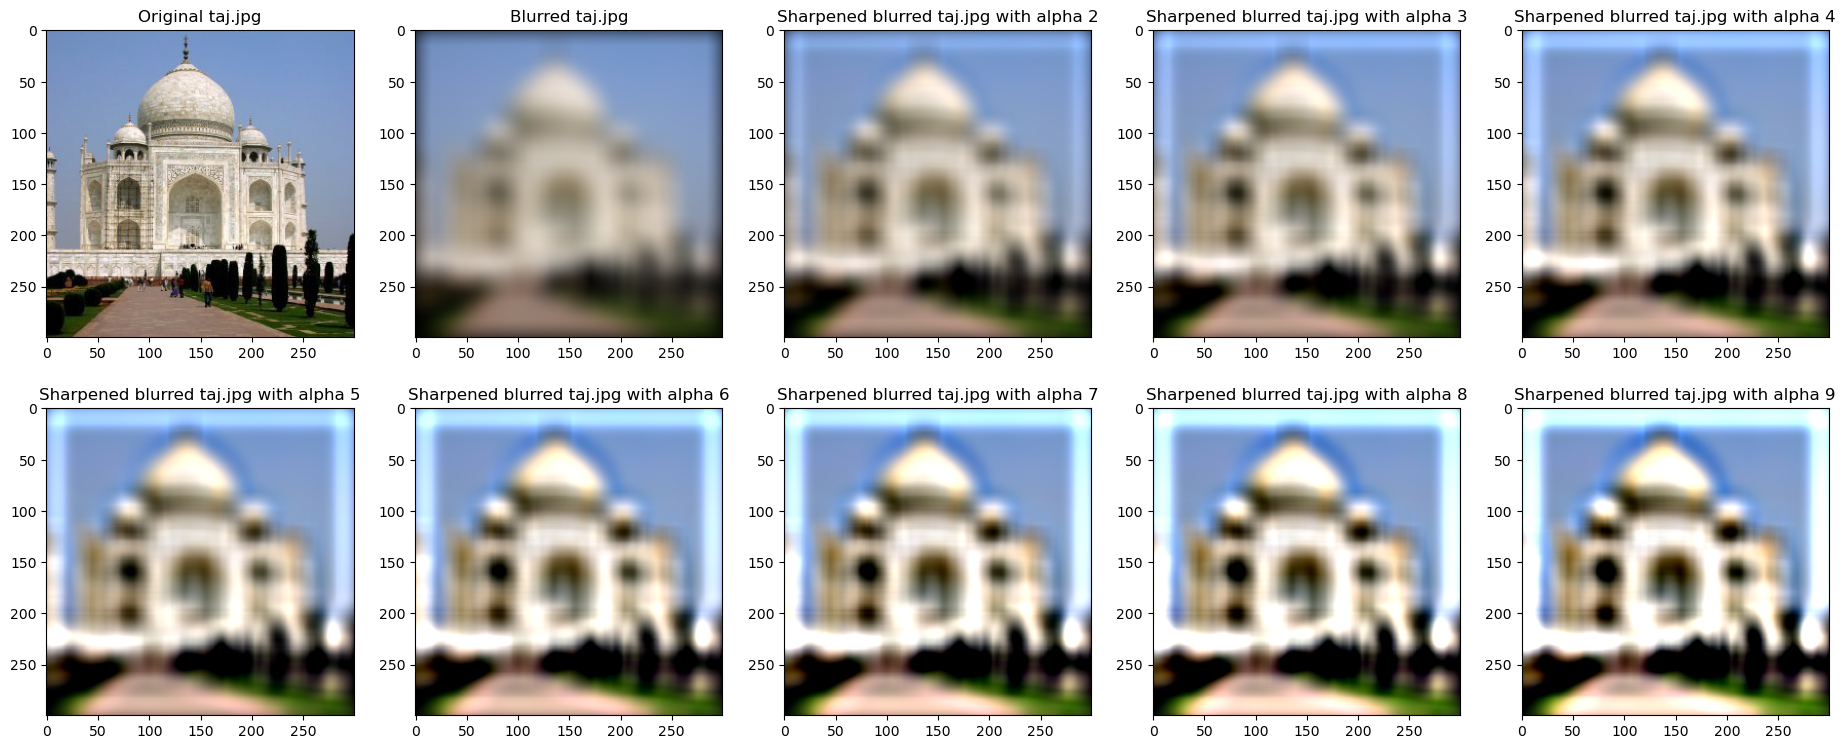

In [15]:
kernel_size = 33
kernel_sigma = 11

taj_img = get_file_image("taj.jpg")
blurred_taj = unsharpen_image(taj_img, kernel_size, kernel_sigma)

########## SHOW RESULTS ##########
plot_rows = 2
plot_cols = 5

figure, axes = plt.subplots(plot_rows, plot_cols, figsize=(23, 9))
axes[0, 0].imshow(taj_img)
axes[0, 0].set_title("Original taj.jpg")

axes[0, 1].imshow(blurred_taj)
axes[0, 1].set_title("Blurred taj.jpg")

for i in range(2, plot_rows * plot_cols):
    row = i // plot_cols
    col = i % plot_cols
    
    sharpened_image = sharpen_image(blurred_taj, alpha=i)
    axes[row, col].imshow(sharpened_image)
    axes[row, col].set_title("Sharpened blurred taj.jpg with alpha {}".format(i))
    

#### Findings
Taking the image from taj.jpg and sharpening it after blurring it does not result in a perfect restoration to the original image. This is because the process of blurring followed by sharpening can enhance certain features and edges in the image, but it is not a true restoration process.

### Part 2.2: Hybrid Images
Overview
The goal of this part of the assignment is to create hybrid images using the approach described in the SIGGRAPH 2006 [paper](http://olivalab.mit.edu/publications/OlivaTorralb_Hybrid_Siggraph06.pdf) by Oliva, Torralba, and Schyns. Hybrid images are static images that change in interpretation as a function of the viewing distance. The basic idea is that high frequency tends to dominate perception when it is available, but, at a distance, only the low frequency (smooth) part of the signal can be seen. By blending the high frequency portion of one image with the low-frequency portion of another, you get a hybrid image that leads to different interpretations at different distances.